In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['gender'])
df['gender'] = le.transform(df['gender'])
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
import torch

In [ ]:
import torch.nn as nn

In [ ]:
import torch.nn.functional as F

In [ ]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [ ]:
class Model(nn.Module):
  # i/p layer = 7
  # hidden layer = 3
  # o/p layer 1 of two classes
  def __init__(self, in_features = 7, h1 = 8, h2 = 9, out_features = 2):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
torch.manual_seed(42)
model = Model()

In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
X = df.drop('gender', axis = 1)
y = df['gender']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

In [ ]:
# Convert y lables to tensors long
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Optimizer ---> Adam
# lr = (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=7, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=2, bias=True)
)>

In [ ]:
# Train our model
# epoch ? ---> one run through all the trainig data in our network
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get the predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  # Keep Track of our loss
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss {loss}')

    # Do some back propogation: take the error rate of forward propogation and
    #feed it back through the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 and loss 0.8594691753387451
Epoch: 10 and loss 0.7442967295646667
Epoch: 20 and loss 0.6973552703857422
Epoch: 30 and loss 0.7064098119735718
Epoch: 40 and loss 0.7234218716621399
Epoch: 50 and loss 0.719943106174469
Epoch: 60 and loss 0.7023337483406067
Epoch: 70 and loss 0.6826928853988647
Epoch: 80 and loss 0.6685601472854614
Epoch: 90 and loss 0.6622450351715088


Text(0.5, 0, 'Epoch')

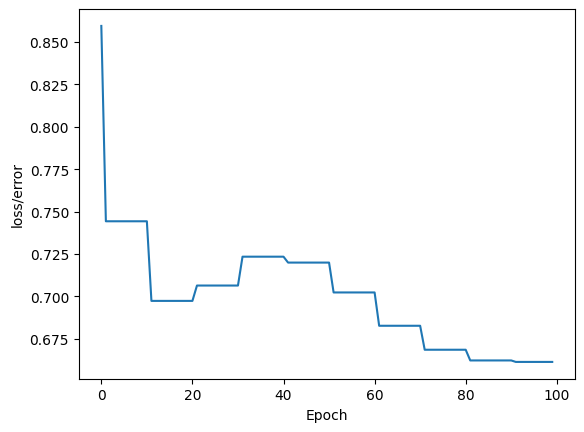

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [ ]:
# Evaluting modle on the test data
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.6614)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i + 1}.) {str(y_val)} \t {y_test[i]}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'we got {correct} correct')

1.) tensor([0.0320, 0.2551]) 	 0
2.) tensor([-0.1302,  0.2617]) 	 1
3.) tensor([0.0503, 0.2149]) 	 0
4.) tensor([0.0391, 0.2654]) 	 0
5.) tensor([0.0646, 0.2080]) 	 0
6.) tensor([-0.1191,  0.2431]) 	 1
7.) tensor([-0.0419,  0.2806]) 	 1
8.) tensor([0.0311, 0.1800]) 	 0
9.) tensor([-0.0173,  0.2572]) 	 1
10.) tensor([-0.1127,  0.2600]) 	 1
11.) tensor([-0.1020,  0.2495]) 	 1
12.) tensor([-0.1152,  0.2493]) 	 1
13.) tensor([-0.0481,  0.2638]) 	 1
14.) tensor([0.1002, 0.2245]) 	 0
15.) tensor([-0.1379,  0.2480]) 	 1
16.) tensor([-0.1453,  0.2641]) 	 1
17.) tensor([-0.0478,  0.2580]) 	 1
18.) tensor([-0.0640,  0.2410]) 	 1
19.) tensor([0.1074, 0.1871]) 	 0
20.) tensor([0.1265, 0.2240]) 	 0
21.) tensor([0.0793, 0.1914]) 	 0
22.) tensor([-0.0457,  0.2371]) 	 1
23.) tensor([0.0781, 0.2165]) 	 0
24.) tensor([0.1122, 0.3013]) 	 1
25.) tensor([-0.0779,  0.2417]) 	 1
26.) tensor([-0.1258,  0.2748]) 	 1
27.) tensor([-0.0515,  0.2204]) 	 0
28.) tensor([0.0791, 0.1953]) 	 0
29.) tensor([0.0925, 0.20